# Heaps

A data structure which is a complete binary tree with some additional properties. Two common kinds of heaps - maxheap and minheap

## Complete binary tree

A heap is a complete binary tree with some additional properties.
What's a complete binary tree ? A binary tree of height h where all elements except the last level are completely filled, and the last level has elements filled in from the left

Note that every full binary tree (all elements available) is a complete binary tree, but not vice versa


In other words, if you have an array representation of a binary tree, there should be no blanks

Example : 

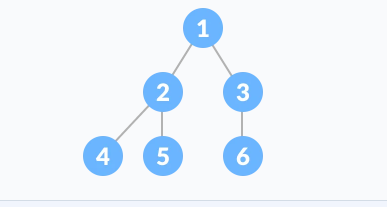

Is a complete binary tree
. Why ? This tree has 3 levels. Leaving the last level, every level above has all elements. The last level has all elements filled in from the left, except the right most element

Alternatively, in array representation, this tree is [1,2,3,4,5,6] - No empty spaces , so complete binary tree

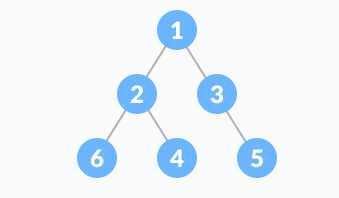

Is not a complete binary tree, as the last level has a blank if you count from the left

ie the array representation is [1,2,3,6,4,blank,5]. Since there is a blank, it is not a complete binary tree

## Max and Min Heaps

In addition to a complete binary tree, a max heap has a property that every parent is greater than its children

In a min heap - every parent is lesser than its children

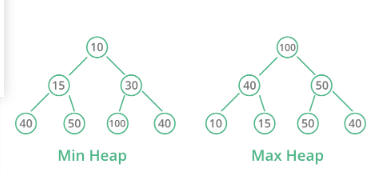

Examples of min and max heaps

In a heap, every element can be represented by an index. For mathematical convenience , the root element is set to index 1. Then we can have exact indices for the children and the parent using mathematical equations

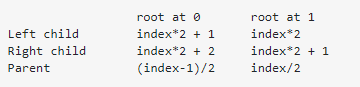

## Main heap operations

1) Insertion - is O(logn) per insertion. When inserting to an existing heap, first, the new element is inserted at the bottom (right most element in array representation) to ensure that new heap after insertion is complete binary tree. Then the elements are adjusted using a bottom up shifting (compare element inserted with its parents till root is reached) and swapping . Since maximum no of swaps possible is h (no of levels of heap), this is O(logn)

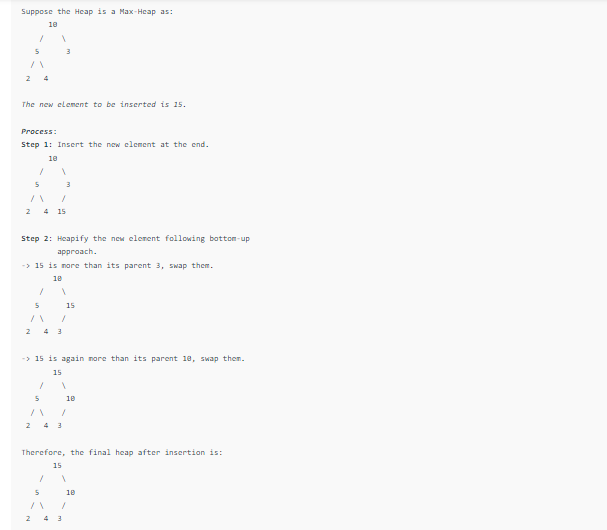

Reference - https://www.geeksforgeeks.org/complexity-analysis-of-various-operations-of-binary-min-heap/




2) Deletion - is O(logn). Deletion is always from top (deleting root node). To do this, first swap the root element with the right most element of the array representation, and delete the right most element . (This ensures that after deletion of right most element, the complete binary tree representation still remains). Then adjust elements topdown (compare every element with its descendants) and swap till we get a max/min heap. This is O(log n) since we have to do at max h swaps


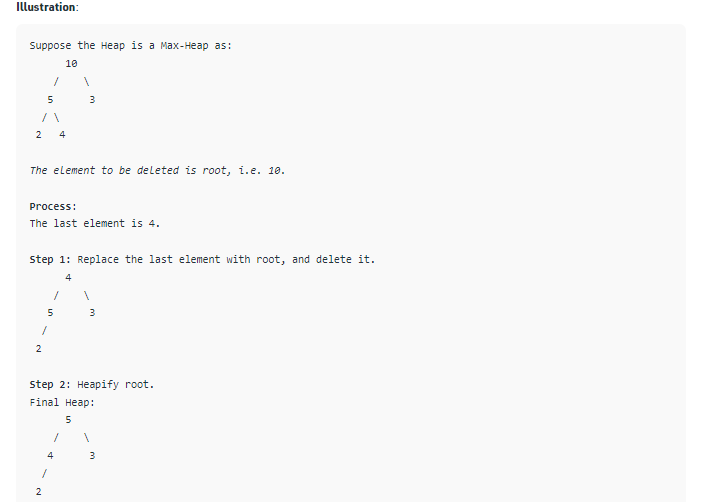


Reference - https://www.geeksforgeeks.org/complexity-analysis-of-various-operations-of-binary-min-heap/

## Heap implementation python

## Existing Python implementation
### Note that python heapq unlike textbooks uses 0 based indexing

In [69]:
import heapq
H = [21,1,45,78,3,5]
heapq.heapify(H) ## O(n)


In [71]:
print(H)

[1, 3, 5, 78, 21, 45]


In [84]:
heapq.heappush(H,7)  ## inserts an item

In [74]:
print(H)

[1, 3, 5, 78, 21, 45, 7]


In [76]:
heapq.heapify(H)

In [77]:
print(H)

[1, 3, 5, 78, 21, 45, 7]


In [78]:
import heapq

H = [21,1,45,78,3,5]
# Covert to a heap
heapq.heapify(H)
print(H)

# Add element
heapq.heappush(H,8)
print(H)

[1, 3, 5, 78, 21, 45]
[1, 3, 5, 78, 21, 45, 8]


In [79]:
heapq.heapify(H)

In [82]:
heapq.heappush(H,2)

In [83]:
H

[1, 2, 5, 3, 21, 45, 8, 78]

In [ ]:
heapq.heappop()

## From scratch implementation

In [49]:
## assume 1 indexing in array, so at 0 position (which is usually how python start indices),
## put empty element

import numpy as np
class MinHeap(object):
    
    def __init__(self, maxSize ):
        self.maxSize = maxSize
        self.size = 0
        self.heap = [np.nan]*(maxSize + 1)    
        
        
    def parent(self, pos): ## given index of node, returns index of parent,assumes 1indexing
        return (pos)//2
    
    def leftChild(self, pos):## given index of parent, returns index of left child, assumes 1 ndexing
        return (2*pos)
    
    def rightChild(self, pos):
        return (2*pos + 1)
    
    def isLeaf(self, pos):  ## if a hypothetical left child of node has index greater than size of heap, then its leaf node
        
        if self.leftChild(pos)>self.size:
            return True
        else:
            return False
        
    def swap(self, first_position, second_position):
        self.heap[first_position], self.heap[second_position] = self.heap[second_position], self.heap[first_position]
       
    
    def minHeapify(self, pos): ## compare node with children if non-leaf node, and do swap operations
        if not self.isLeaf(pos):
            if (self.heap[self.leftChild(pos)]<self.heap[pos]):
                self.swap(pos, self.leftChild(pos))
                self.minHeapify(self.leftChild(pos))
                

            if (self.heap[self.rightChild(pos)]<self.heap[pos]):
                self.swap(pos, self.rightChild(pos))
                self.minHeapify(self.rightChild(pos))
                
    def insert(self, element): ## insert element in heap, O(logn). insert new element at end of heap to create a CBT, and then swap value at that position upwards
        self.heap[self.size+1] = element
        self.size = self.size + 1
        current = self.size
        
        while (self.heap[current]<self.heap[self.parent(current)]):
            self.swap(current, self.parent(current))
            current = self.parent(current)
            
    def delete(self):
        if self.size >= 1:
            popped = self.heap[1]
            self.swap(self.size, 1)
            self.heap[self.size] = np.nan
            self.size = self.size-1
            self.minHeapify(1)
            return popped
    
    def print_heap(self):
        for i in range(1, self.size//2 + 2):
            print("Parent", i , self.heap[i])
            print("Left Child", self.leftChild(i), self.heap[self.leftChild(i)])
            print("Right Child", self.rightChild(i), self.heap[self.rightChild(i)])
    
    
    
    
                                                             
            
        
        
        
        
        
        
        
    
        
        

    
    
        
        

In [50]:
maxSize = 7

In [51]:
a = MinHeap(maxSize)

In [67]:
a.heap[]

[nan, 21, 25, nan, nan, nan, nan, nan]

In [53]:
a.insert(1)

In [54]:
a.insert(0)

In [55]:
a.print_heap()

Parent 1 0
Left Child 2 1
Right Child 3 nan
Parent 2 1
Left Child 4 nan
Right Child 5 nan


In [64]:
a.insert(21)

In [65]:
a.size

2

In [66]:
a.heap

[nan, 21, 25, nan, nan, nan, nan, nan]

In [62]:
a.delete()

1

In [13]:
for i in range(1,1):
    print(i)

## References

1) https://leetcode.com/discuss/general-discussion/1127238/master-heap-by-solving-23-questions-in-4-patterns-category
2) https://www.geeksforgeeks.org/complexity-analysis-of-various-operations-of-binary-min-heap/
3) https://www.geeksforgeeks.org/min-heap-in-python/
4) https://www.tutorialspoint.com/python_data_structure/python_heaps.htm
5) https://docs.python.org/3/library/heapq.html

In [2]:
import sys
sys.maxsize

9223372036854775807